# 第二章 卷积神经网络(CNN)相关理论

## 2.1 机器学习基础

机器学习可以分为监督学习(Supervised Learning)和非监督学习(Unsupervised Learning)，其中，监督学习又有两类任务：回归和分类。

### 2.1.1 线性回归

线性回归是处理回归任务的最简单模型，对于简单线性回归来说，我们可以作出如下假设：


$$
h_\theta(x^{(i)})=\theta _0 + \theta _1x^{(i)}
$$

其中的$\theta _0$和$\theta_1$代表模型的参数。线性回归的目标是求得最适合的$\theta _0$和$\theta _1$使得模型效果最好。

衡量模型效果好坏的函数叫代价函数(Cost Function)，其中，均方误差(Mean Squared Error)是最简单的代价函数。

均方误差就是求预测值与真实值之间的差值的平方，即：

$$J(\theta)=\frac{1}{2m}\sum^m_{i=1}(h_{\theta}(x^{(i)})-y^i)^2$$

我们的目标是找到合适的参数$\theta$，使代价函数最小。因为梯度的反方向是函数值减小最快的方向，故我们更新自变量的策略为：

$$
\begin{align}
\theta _j &= \theta _j - \alpha \frac{\partial }{\partial \theta _j}J(\theta) \\
          &=\theta _j - \alpha\frac{1}{m}\sum^m_{i=1}(h_\theta (x^i)-y^i)x_j^i
\end{align}
$$

其中$\alpha$是学习率，即参数更新的步长，$\frac{\partial }{\partial \theta _j}J(\theta) = \frac{1}{m}\sum^m_{i=1}(h_\theta (x^i)-y^i)x_j^i$


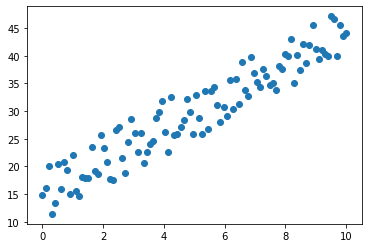

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random

size = 100
X = np.linspace(0, 10, 100)
Y = [3*i+10 + 10*random.random() for i in X]
plt.scatter(X, Y)

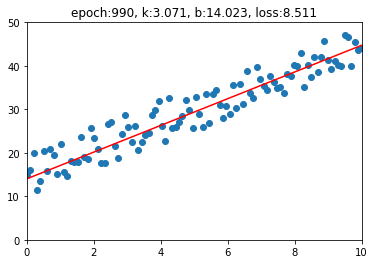

In [4]:
from IPython import display
# y = kx + b

iters = 1000
k = 1
b = 1
lr = 0.01

for epoch in range(iters):
    y_pred = k * X + b
    loss = np.mean((y_pred - Y) ** 2)
    k = k - (lr/size) * np.dot(y_pred - Y, X.T)
    b = b - (lr/size) * np.sum(y_pred - Y)
    if epoch % 10 == 0:
        display.clear_output(wait=True)
        x_line = np.linspace(0, 10, 1000)
        y_line = k * x_line + b
        plt.plot(x_line, y_line, 'r')
        plt.title(f"epoch:{epoch}, k:{round(k, 3)}, b:{round(b, 3)}, loss:{round(loss, 3)}")
        plt.xlim(0, 10)
        plt.ylim(0, 50)
        plt.scatter(X, Y)
        plt.pause(0.1)

### 2.1.2 逻辑回归

逻辑回归虽然名字中有“回归”，但其实际上是分类模型，并常用于二分类。首先我们定义sigmoid函数为：

$$\begin{equation}
y = \frac{1}{1+e^{-x}}
\end{equation}$$

其定义域为：$(-\infty, +\infty)$,值域为：$(0, 1)$,导数为：$y'=y(1-y)$

假设我们的模型为：

$$h_{\theta}(x)=\frac{1}{1+e^{-\theta ^ T x}}$$

其中$x:[1 , x_1 , x_2]^T \qquad \theta:[b, w_1, w_2]^T$

逻辑回归的代价函数与线性回归不同，其主要方法是极大似然估计。其推导如下：

设$p\{y=1|x;\theta\} = h_{\theta (x)}$，设$p\{y=0|x;\theta\} = 1- h_{\theta (x)}$

则似然函数：$L=\prod^m_{i=1}p^{(i)} = \prod ^m_{i=1}h_{\theta}^y(x)(1-h_{\theta}(x))^{1-y}$

两边取对数：$log(L) = \sum^m_{i=1}\{ylogh_{\theta}(x)+(1-y)log[1-h_{\theta}(x)]\}$

我们的目标是使L最大，即事件发生概率最大，所以定义代价函数如下：

$$J(\theta)=-\frac{1}{m}\sum^{m}_{i=1}[y^ilog(h_{\theta}(x^i)) + (1-y^i)log(1-h_\theta (x^i))]$$

逻辑回归梯度下降：

$$\frac{\partial J}{\partial \theta} = - \frac{1}{m} \sum ^m _{i=1}[yi\frac{\frac{\partial h_{\theta}(x^i)}{\partial \theta}}{h_{\theta (x^i)}} + (1-y^i)\frac{\frac{\partial h_{\theta}(x^i)}{\partial \theta}}{1-h_{\theta (x^i)}}]$$

其中$\frac{\partial h(x)}{\partial \theta} = [h(x)[1-h(x)]x_j ^ {(i)}]$,代入上式化简可得：

$$\frac{\partial J}{\partial \theta} = \frac{1}{m}\sum^m_{i=1}(h_\theta (x^i)-y^i)x_j^i$$

逻辑回归一般解决二分类问题，当遇到多分类时，通常有两种方法：

- 一对多：

例如现在有三个类别：A,B,C，我们可以训练一个模型分出A与B,C，另一个模型分出B与A,C，最后一个模型分出C与A,B

优点：需要训练的模型较少

缺点：样本不均衡

- 一对一：

假如需要分k类，我们需要训练$C^2_k$个模型，即每两个类训练一个模型

优点：数据少、样本均衡

缺点：需要训练的模型较多

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from IPython import display

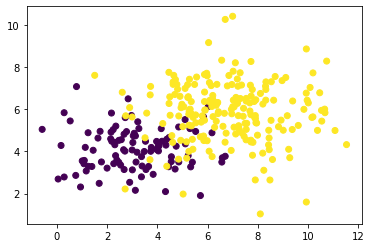

In [3]:
## 创建数据集
np.random.seed(999)

data_0 = np.random.multivariate_normal(mean=[3, 4], cov=[[3, 0], [0, 1]], size=100)  # 第0类:100个样本
data_1 = np.random.multivariate_normal(mean=[7, 6], cov=[[3, 0], [0, 2]], size=200)  # 第1类:200个样本
data_x = np.vstack((data_0, data_1))
data_y = np.hstack((np.array([0]*100), np.array([1]*200)))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y)

In [4]:
data = list(zip(data_x, data_y))  # 将x，y打包
random.shuffle(data)  # 打乱
data_x, data_y = zip(*data) # 解包
data_x = np.array(data_x)
data_y = np.array(data_y)

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
def cal_loss(y_pred, data_y):
    return -np.mean(data_y*np.log(y_pred) + (1-data_y)*np.log(1-y_pred))

In [7]:
def cal_acc(y_pred, data_y):
    return np.mean((y_pred >= 0.5) == data_y)

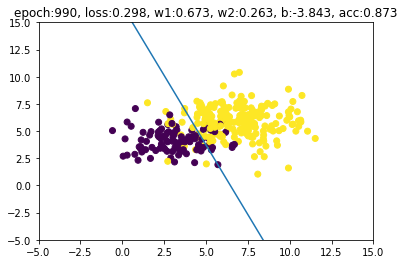

In [10]:
iters = 1000
w1 = 1
w2 = 1
b = 1
lr = 0.1
size = data_x.shape[0]
for epoch in range(iters):
    y_pred = sigmoid(w1*data_x[:, 0] + w2*data_x[: ,1] + b)
    loss = cal_loss(y_pred, data_y)
    w1 = w1 - (lr/size) * np.dot((y_pred - data_y), data_x[:, 0].T)
    w2 = w2 - (lr/size) * np.dot((y_pred - data_y), data_x[:, 1].T)
    b = b - (lr/size) * np.sum(y_pred - data_y)
    if epoch % 10 == 0 :
        display.clear_output(wait=True)
        line_x = np.linspace(-5, 15, 1000)
        line_y = (0.5-b-w1*line_x)/w2
        plt.xlim(-5, 15)
        plt.ylim(-5, 15)
        plt.plot(line_x, line_y)
        plt.title(f'epoch:{epoch}, loss:{round(loss, 3)}, w1:{round(w1 ,3)}, w2:{round(w2, 3)}, b:{round(b, 3)}, acc:{round(cal_acc(y_pred, data_y), 3)}')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y)
        plt.pause(0.5)

### 2.1.3 神经网络（Neural Network）

#### 2.1.3.1 为什么需要神经网络?

与前面介绍的线性回归和逻辑回归不同，神经网络通常解决非线性问题，如下图（上）所示的非线性回归问题和下图（下）所示的非线性分类问题：

<div align=center><img width="60%" height="60%" src="./regression.png"></div>

<div align=center><img width="60%" height="60%" src="./classification.png"></div>

线性回归和逻辑回归就不能很好地处理这两种问题。

#### 2.1.3.1 什么是神经网络?

神经网络的基本结构如下图所示：

<div align=center><img width="60%" height="60%" src="./NN.jpg"></div>

设输入为x维，隐藏层为h维，输出为y维，激活函数为g(x)

- 输入层

输入层维度数就是样本的特征数，例如一个二维坐标有两个特征：x和y，所以输入层为二维；一张32$\times$32的图片有$32^2$个特征，故输入层的维度数为$32^2$

- 输入层到隐藏层

输入层到隐藏层其实就是h个线性回归模型，表达式为：

$$H_{(1 \times h)}=X_{(1 \times x)} \cdot W_{1(x \times h)} + b_{1(1 \times h)}$$

- 激活层

简而言之，激活层是为矩阵运算的结果添加非线性的。常用的激活函数有Sigmoid、Tanh和ReLU。
它们的函数图像如下所示：

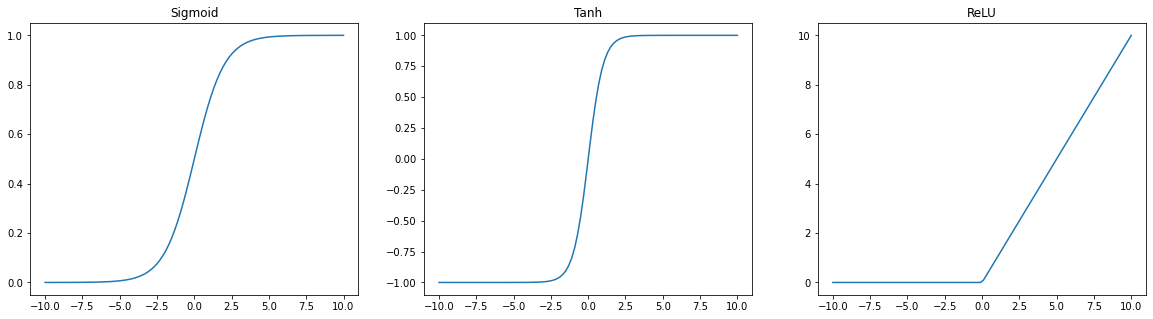

In [60]:
x = np.linspace(-10, 10, 100)
y1 = 1/(1+np.exp(-x))
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(x, y1)
plt.title('Sigmoid')
plt.subplot(132)
y2 = np.tanh(x)
plt.plot(x, y2)
plt.title('Tanh')
plt.subplot(133)
y3 = list(map(lambda x:x if x > 0 else 0, x))
plt.plot(x, y3)
plt.title('ReLU')
plt.show()

- 从隐藏层到输出层

连接隐藏层和输出层的是$W_2$和$b_2$。同样是通过矩阵运算进行的：

$$Y = H \cdot W_2+b_2$$

- Softmax

假设有一个数组Y，$Y_i$表示$Y$中的第$i$个元素，那么这个元素的Softmax值为：

$$S_i=\frac{e^{z_i}}{\sum _{j=1}^y e^{z_j}}$$

该元素的softmax值，就是该元素的指数与所有元素指数和的比值。但是如果$z$的值很大时，会出现数据溢出的情况，优化版的softmax可以防止这种情况，其表达式如下：

$$S_i=\frac{e^{z_i-max(z)}}{\sum _{j=1}^y e^{z_j-max(z)}}$$

- 交叉熵损失函数

$$J(\theta) = - \frac{1}{m}\sum ^m_{i=1}\sum^k_{k=1}y_k^ilnp^i_k $$

对于分类任务来说，$y = (0, 0, \cdots, 1, \cdots, 0)^T$，设第$k$个元素为1，则：

$$J(\theta) = -\frac{1}{m} \sum^m_{i=1} ln p_k^i$$

其中$p_i = \frac{e^{z_k}}{\sum e^{z_j}},\qquad$

故$L = -lnp_k$

#### 2.1.3.3 怎么实现神经网络?

神经网络最核心的部分就是bp算法，其主要思想就是高数中的复合函数求导，下面举一个简单的例子：

<div align=center><img width="60%" height="60%" src="./chain.png"></div>

$$ 其中，\left\{
\begin{aligned}
c & =  a+b \\
d & =  b +1 \\
e & =  c \times d
\end{aligned}
\right.
$$

$$ 故，\left\{
\begin{aligned}
\frac{\partial e}{\partial d} & = c \\
\frac{\partial e}{\partial c} & = d \\
\frac{\partial e}{\partial b} & = \frac{\partial e}{\partial d}\frac{\partial d}{\partial b} +\frac{\partial e}{\partial c}\frac{\partial c}{\partial b} = d +c = a + 2b +1\\
\frac{\partial e}{\partial a} & = \frac{\partial e}{\partial d}\frac{\partial d}{\partial a} +\frac{\partial e}{\partial c}\frac{\partial c}{\partial a} = d = b +1\\
\end{aligned}
\right.
$$


下面完整推导一次神经网络的反向传播：

|变量|含义|
|--|--|
|x|输入样本|
|h|第一层输出|
|a|对第一层输出激活|
|z|第二层输出|
|p|对第二层输出进行softmax|
|L|对p求损失|
|w1|第一层权重|
|w2|第二层权重|
|b1|第一层偏置|
|b2|第二层偏置|
|y|标签|

这里以一个样本为例：
设$y = (0, 0, \cdots, 1, \cdots, 0)^T$，其中第k个元素为1
1. softmax - loss 
$$L = -lnp_k$$
$$\frac{\partial L_k}{\partial p_i} = \left\{
\begin{aligned}
& -\frac{1}{p_k} &i=k\\
& 0 &i \neq k
\end{aligned}
\right.$$



2. z - softmax

$$p_i = \frac{e^{z_i}}{\sum _j e^{z_j}}$$
当$i=k$时

$$\frac{\partial p_k}{\partial z_k} = \frac{\sum_j e^{z_j} e^{z_k} - e^{z_k}e^{z_k}}{(\sum_j e^{e_j})^2} = p_k(1-p_k)$$

此时，$\frac{\partial L_k}{\partial z_k} = p_k - 1$

当$i \neg k $时

$$\frac{\partial p_k}{\partial z_i} = -\frac{e^{z_k}e^{z_i}}{(\sum_j e^{e_j})^2} = -p_kp_i$$

此时，$\frac{\partial L_k}{\partial z_i} = p_i$

前面几层参考线性回归即可，至此，神经网络全部介绍完了，下面用代码实现一下


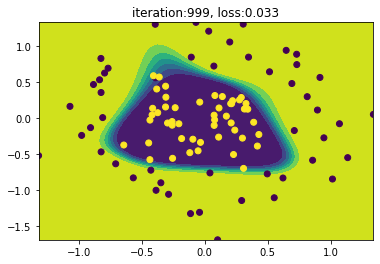

In [11]:
from IPython import display
from sklearn import datasets
import pandas as pd
np.random.seed(0)

X, y = datasets.make_circles(100, noise=0.2, factor=0.3)

def softmax(z):
    return np.exp(z)/np.exp(z).sum(keepdims=True, axis=1)

def crossentropy(p, y):
    return np.mean(-np.log(p[range(size), y]))

def inference(x1, x2, W1, b1, W2, b2):
    ## x1:scalar是第一个特征, X1:(2, )是一个样本
    X = np.hstack(([x1], [x2]))
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_z2 = np.exp(z2)
    probs = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
    #print(z2.shape)
    return probs[0][0]

lr = 1e-2
iters = 1000
input_dim = 2
hidden_dim = 10
output_dim = 2
size = y.shape[0]
np.random.seed(0)
w1 = np.random.randn(input_dim, hidden_dim)
np.random.seed(0)
b1 = np.random.randn(1, hidden_dim)
np.random.seed(0)
w2 = np.random.randn(hidden_dim, output_dim)
np.random.seed(0)
b2 = np.random.randn(1, output_dim)
for epoch in range(iters):
    h = X.dot(w1) + b1  # size*hidden_dim
    a = np.tanh(h)
    z = np.dot(a, w2) + b2  # size*output_dim 
    p = softmax(z)  # size*output_dim 
    l = crossentropy(p, y)
    dz = p.copy()  # size*output_dim
    dz[range(size), y] -= 1 
    dw2 = np.dot(a.T, dz)  # hidden_dim * output_dim
    db2 = np.sum(dz, axis=0, keepdims=True)
    dh = dz.dot(w2.T) * (1 - np.power(a, 2))
    dw1 = np.dot(X.T, dh)
    db1 = np.sum(dh, axis=0, keepdims=True)
    
    w2 -= lr * dw2
    b2 -= lr * db2
    w1 -= lr * dw1
    b1 -= lr * db1
    
    x_line = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_line = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    mesh_x, mesh_y = np.meshgrid(x_line, y_line)
    z_prob = np.zeros_like(mesh_x)
    for ix in range(z_prob.shape[0]):
        for iy in range(z_prob.shape[1]):
            z_prob[ix][iy] = inference(mesh_x[ix][iy], mesh_y[ix][iy], w1, b1, w2, b2)      
    display.clear_output(wait=True)
    axes = plt.gca()
    axes.set_title(f'iteration:%d, loss:%.3f' % (epoch, l))
    plt.contourf(mesh_x, mesh_y, z_prob)
    axes.scatter(X[:, 0], X[:, 1], c=y)
    plt.pause(0.01)

### 2.1.4 k-均值聚类(k-means)

聚类算法是无监督学习中最常见的算法，聚类算法有几十种，其中k-means聚类是最常用的一种，该算法最大的特点就是简单，好理解，运算速度快，但是一定要在聚类前需要手工指定分成几类，并且每次的聚类结果不一定相同，其步骤可以简化为下面几步：

1. 指定k值即将样本聚为k类
2. 随机找出k个样本作为样本中心
3. 计算剩余样本所属的类别（根据距离样本中心距离最近来聚类）
4. 重新计算k类样本的样本中心（每类样本特征的均值作为样本中心）
5. 重复3和4，直至每个样本所属类别没有变化

其中第5步也可以改为执行n轮，n轮后结束算法。

**k-means算法的改进：**

1. 初始化样本中心

1a. 首先随机抽取一个样本c1作为第一类的样本中心

1b. 根据概率$\frac{D^2(x)}{\sum x \in X D^2(x)}$来随机抽取下一个样本中心

1c. 重复1b，直至找到k个样本中心

进过这个改进，初始化的样本中心距离会尽可能远，从而减少迭代次数

2. k的选取可以选择三种方法：elbow/more/ISODATA
其中最常用的是肘方法：

2a. 对于n个点的数据集，迭代计算k from 1 to n，每次聚类完成后计算每个点到其所属的簇中心的距离的平方和；

2b. 平方和是会逐渐变小的，直到k==n时平方和为0，因为每个点都是它所在的簇中心本身。

2c. 在这个平方和变化过程中，会出现一个拐点也即“肘”点，下降率突然变缓时即认为是最佳的k值。

<div align=center><img width="30%" height="30%" src="./elbow.png"></div>

下面同样用代码实现一遍k-means聚类：

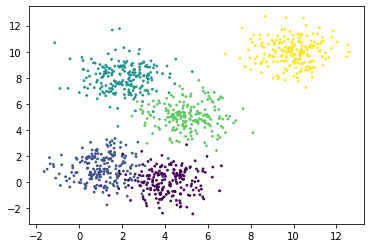

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from IPython import display

def create_data():
    X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=[[4, 0], [1, 1], [2, 8], [5, 5], [10, 10]])
    return X, y

np.random.seed(99)
X, y = create_data()
plt.scatter(X[:, 0], X[:, 1], c=y, s=3)

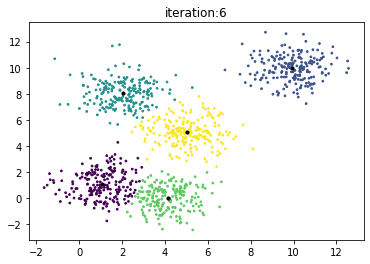

In [60]:
def distance(center, sample):
    return np.sqrt(np.power(center - sample, 2).sum())

np.random.seed(99)
k = 5
size = X.shape[0]
prior, classes = None, None
iteration = 0
# 初始k个化样本中心
centers = X[np.random.choice(size, k), :]
while True:
    iteration += 1
    prior = classes
    classes = np.zeros(size)
    for index, sample in enumerate(X):
        mindistance = np.inf
        for i, center in enumerate(centers):
            dist = distance(center, sample)
            if dist < mindistance:
                mindistance = dist 
                classes[index] = i
    for i in range(k):
        centers[i] = X[classes == i, :].mean(0)
        
    display.clear_output(wait=True)
    plt.scatter(X[:, 0], X[:, 1], c=classes, s=3)
    plt.scatter(centers[:, 0], centers[:, 1], s=10, c='k')
    plt.title(f"iteration:{iteration}")
    plt.pause(0.1)
    plt.show()
    
    if (prior == classes).all():
        break
